In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [97]:
ticker_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

In [98]:
aapl_data = yf.download('AAPL', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [99]:
aapl_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461975,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800
...,...,...,...,...,...,...
2024-07-31,221.440002,223.820007,220.630005,222.080002,222.080002,50036300
2024-08-01,224.369995,224.479996,217.020004,218.360001,218.360001,62501000
2024-08-02,219.149994,225.600006,217.710007,219.860001,219.860001,105568600


# Calculating Moving Average Alongside Closing Price

# Bullish and bearish trends are terms used to describe patterns in stock market indexes.

# A bullish trend indicates that prices are likely to rise
# A bearish trend indicates that prices are likely to fall

In [100]:
aapl_data['ma20'] = aapl_data['Close'].rolling(20).mean()
aapl_data['ma50'] = aapl_data['Close'].rolling(50).mean()

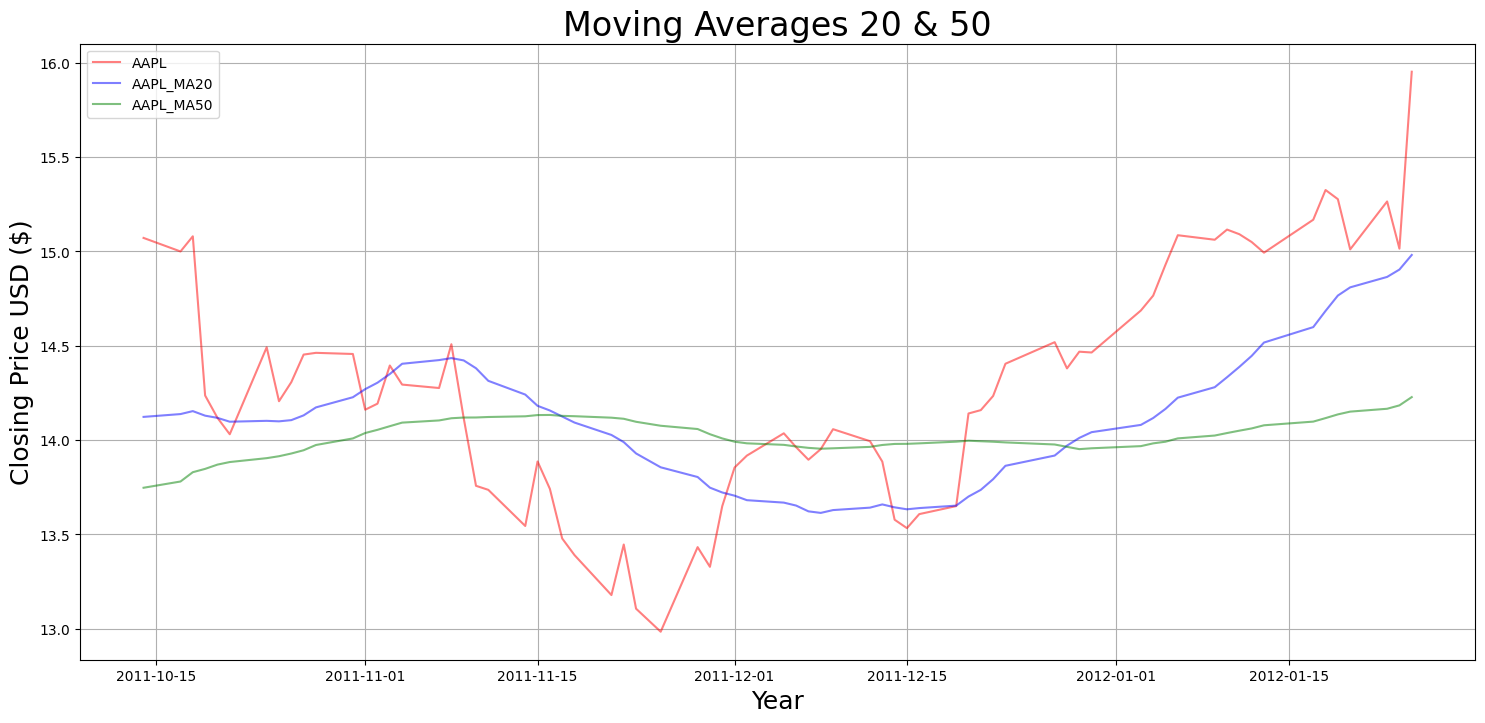

In [115]:
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(aapl_data['Close'][450:520], c='red', label='AAPL', alpha=0.5)
ax.plot(aapl_data['ma20'][450:520], c='b', label='AAPL_MA20', alpha=0.5)
ax.plot(aapl_data['ma50'][450:520], c='green', label='AAPL_MA50', alpha=0.5)

ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Closing Price USD ($)', fontsize=18)
ax.set_title('Moving Averages 20 & 50', fontsize=24)

plt.legend()
plt.grid(True)
plt.show()

# Calculate Daily Returns and Volatility

In [104]:
aapl_data['Daily Return'] = aapl_data['Close'].pct_change()
aapl_data['Rolling Volatility'] = aapl_data['Daily Return'].rolling(20).std()

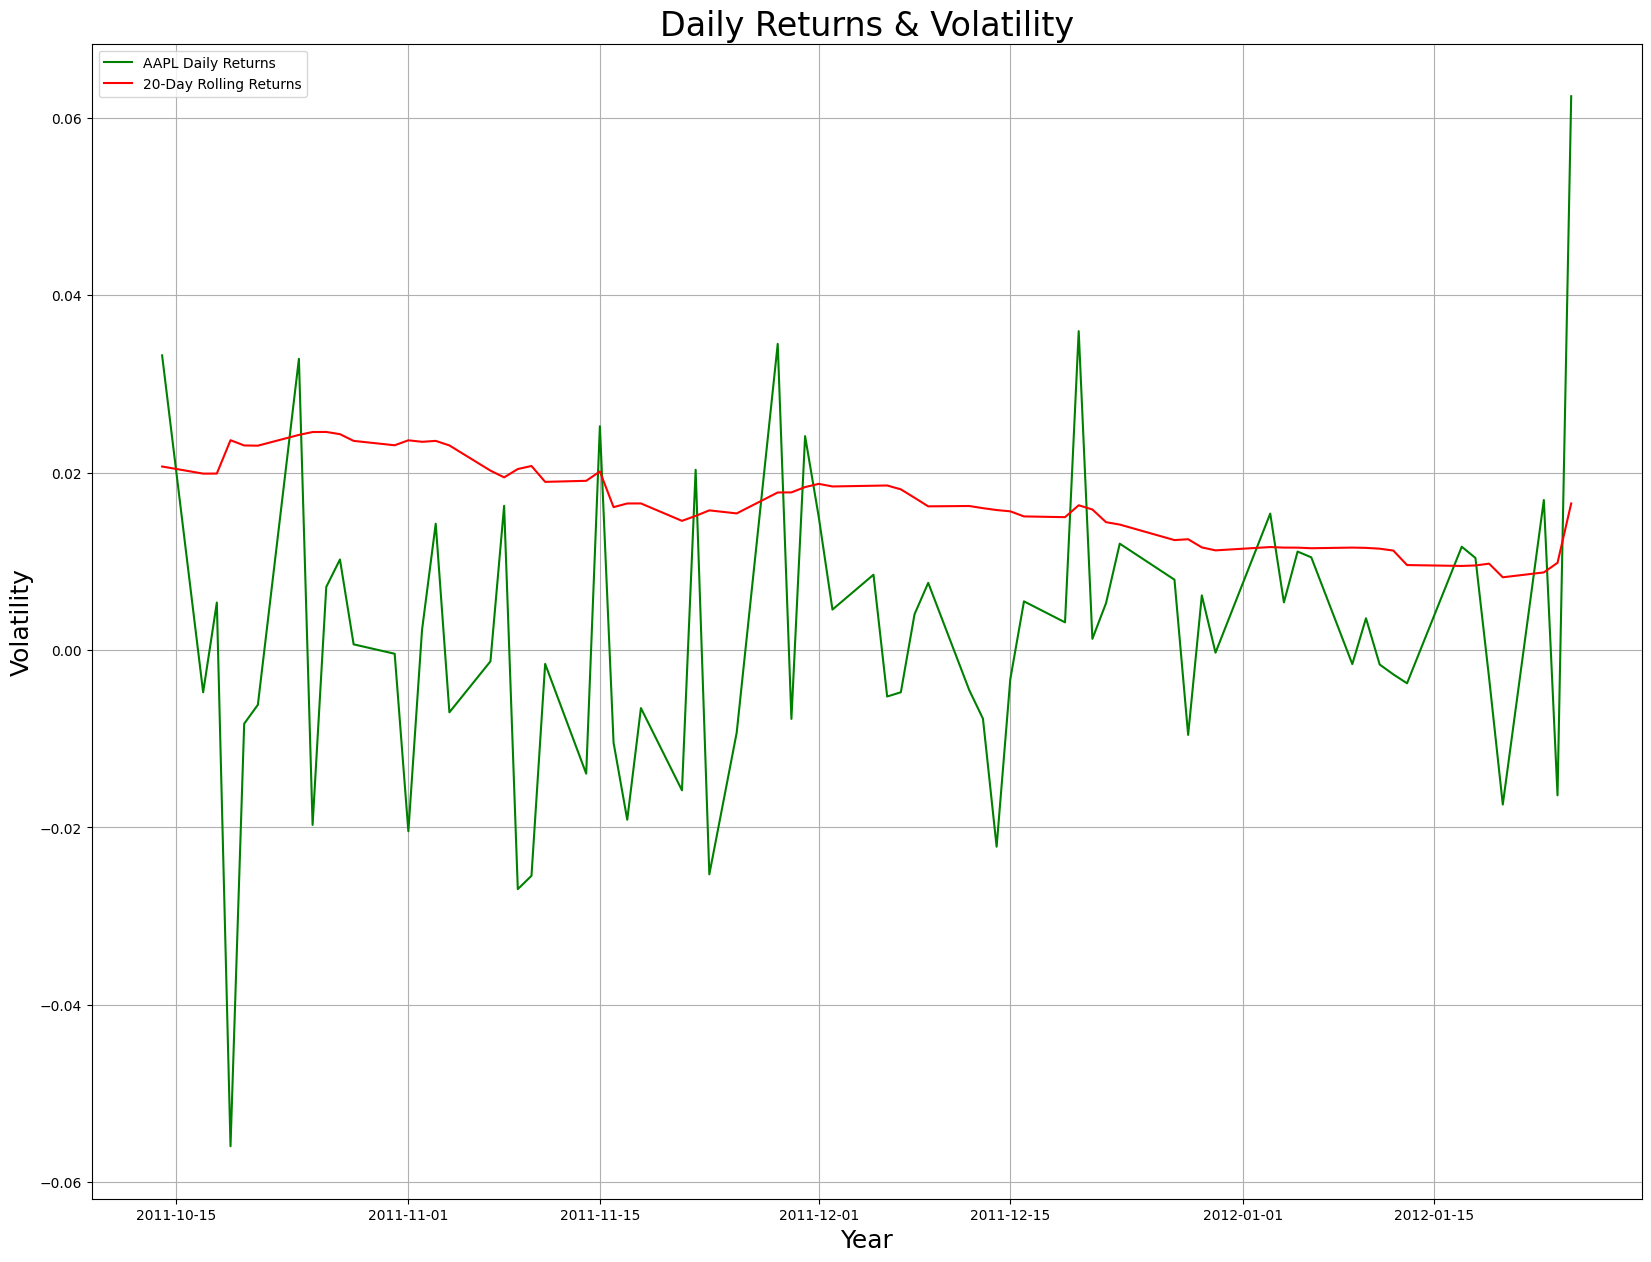

In [116]:
fig, ax = plt.subplots(figsize=(20,15))

ax.plot(aapl_data['Daily Return'][450:520], c='g', label='AAPL Daily Returns')
ax.plot(aapl_data['Rolling Volatility'][450:520], c='r', label='20-Day Rolling Returns')

ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Volatility', fontsize=18)
ax.set_title('Daily Returns & Volatility', fontsize=24)

plt.legend()
plt.grid(True)
plt.show()